In [1]:

#import funciones  

import sys
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('C:/Users/ingse/OneDrive/Desktop/repositorio/pj_sa_202402/src'))
from funciones import *
pd.set_option('display.float_format', '{:,.2f}'.format)
#carga archivos 
archivo_excel = r'C:\Users\ingse\OneDrive\Desktop\repositorio\pj_sa_202402\src\TM_hombres.xlsx'
tm_hombre = pd.read_excel(archivo_excel)
tm_hombre=(TMensual(tm_hombre))
print(tm_hombre.head(5)) 

archivo_excel = r'C:\Users\ingse\OneDrive\Desktop\repositorio\pj_sa_202402\src\TM_mujeres.xlsx'
tm_mujer = pd.read_excel(archivo_excel)
tm_mujer=(TMensual(tm_mujer))
print(tm_mujer.head(5)) 

archivo_excel = r'C:\Users\ingse\OneDrive\Desktop\repositorio\pj_sa_202402\src\datos_longevidad.xlsx'
longevidad = pd.read_excel(archivo_excel, sheet_name='Data')
print(longevidad.head(5)) 



      x         l(x)  q(x)  p(x)
0 15.00 1,000,000.00  0.00  1.00
1 15.08   999,959.58  0.00  1.00
2 15.17   999,919.17  0.00  1.00
3 15.25   999,878.75  0.00  1.00
4 15.33   999,838.33  0.00  1.00
      x         l(x)  q(x)  p(x)
0 15.00 1,000,000.00  0.00  1.00
1 15.08   999,977.33  0.00  1.00
2 15.17   999,954.67  0.00  1.00
3 15.25   999,932.00  0.00  1.00
4 15.33   999,909.33  0.00  1.00
   Unnamed: 0  Edad  Casado Genero  Edad_pareja Sexo_pareja  Pago_mensual
0           1    68       0      M            0           0  4,196,583.06
1           2    67       1      H           67           H  1,983,941.40
2           3    80       1      H           77           H  4,014,628.81
3           4    71       1      H           85           M  5,710,179.97
4           5    66       0      M            0           0  7,882,172.76


In [2]:
v_jubilado=[]
v_pareja=[]
i=0.04/12
for index, row in longevidad.iterrows():

    genero=row['Genero']
    if genero=='H':
        tmort=tm_hombre
    else:
        tmort=tm_mujer
        #para  no  casado
    if row['Casado']==0:
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad) * 12
        T['Vn'] = np.ones(len(T)) *(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect = pago * T['Vn'] * T['p(x)']
        va_jubilado = sum_vect.sum()
        va_pareja = 0
        v_jubilado.append(va_jubilado)
        v_pareja.append(va_pareja)
        #para casado
    elif row['Casado']==1:

        
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad)*12
        T['Vn'] = np.ones(len(T))*(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect=pago*T['Vn']*T['p(x)']
        va_jubilado=sum_vect.sum()

        edad_pareja=row['Edad_pareja']
        genero_pareja=row['Sexo_pareja']
        #pareja hombre
        if genero_pareja=='H':
            tmort_pareja=tm_hombre
            #pareja mujer
        else:
            tmort_pareja=tm_mujer
            
        T_par=tmort_filtered(tmort_pareja,edad_pareja)
        T_par['n'] = T_par['x'].apply(lambda x: x - edad_pareja)*12
        T_par['Vn'] = np.ones(len(T_par))*(1/(1+i))
        T_par['Vn'] = T_par.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        #pareja menor 
        if edad<=edad_pareja:
            T_par['q(x)_Jub'] = T['q(x)'][:len(T_par)]
            #pareja mayor
        else:
            lista=[]
            gap=(edad-edad_pareja)*12
            lista = list(T['q(x)'])+list(np.ones(gap))
            T_par['q(x)_Jub']=lista
            
        sum_vect_pareja=pago*T_par['Vn']*T_par['p(x)']*T_par['q(x)_Jub']
        va_pareja=sum_vect_pareja.sum()
        
        v_jubilado.append(va_jubilado)
        v_pareja.append(va_pareja)

longevidad['Valoracion Jubilado']=v_jubilado
longevidad['Valoracion pareja']=v_pareja
longevidad['Pago_mensual']=longevidad['Pago_mensual'].apply(lambda x: f'{x:,.2f}')
longevidad['Valoracion']=longevidad['Valoracion Jubilado']+longevidad['Valoracion pareja']
longevidad
        


    

C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\4104358973.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['n'] = T['x'].apply(lambda x: x - edad) * 12
C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\4104358973.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['Vn'] = np.ones(len(T)) *(1/(1+i))
C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\4104358973.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual,Valoracion Jubilado,Valoracion pareja,Valoracion
0,1,68,0,M,0,0,"4,196,583.06","1,017,456,036.16",0.00,"1,017,456,036.16"
1,2,67,1,H,67,H,"1,983,941.40","484,784,234.22","4,985,840.73","489,770,074.95"
2,3,80,1,H,77,H,"4,014,628.81","828,188,996.93","53,608,562.26","881,797,559.19"
3,4,71,1,H,85,M,"5,710,179.97","1,339,739,654.76","6,941,368.13","1,346,681,022.89"
4,5,66,0,M,0,0,"7,882,172.76","1,946,327,113.36",0.00,"1,946,327,113.36"
...,...,...,...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,"2,994,379.20","640,482,469.74",0.00,"640,482,469.74"
1196,1197,72,1,M,69,H,"3,778,424.20","877,935,210.33","36,050,544.95","913,985,755.27"
1197,1198,76,0,M,0,0,"3,839,464.83","846,745,509.27",0.00,"846,745,509.27"
1198,1199,77,0,H,0,0,"10,827,760.94","2,348,062,669.86",0.00,"2,348,062,669.86"


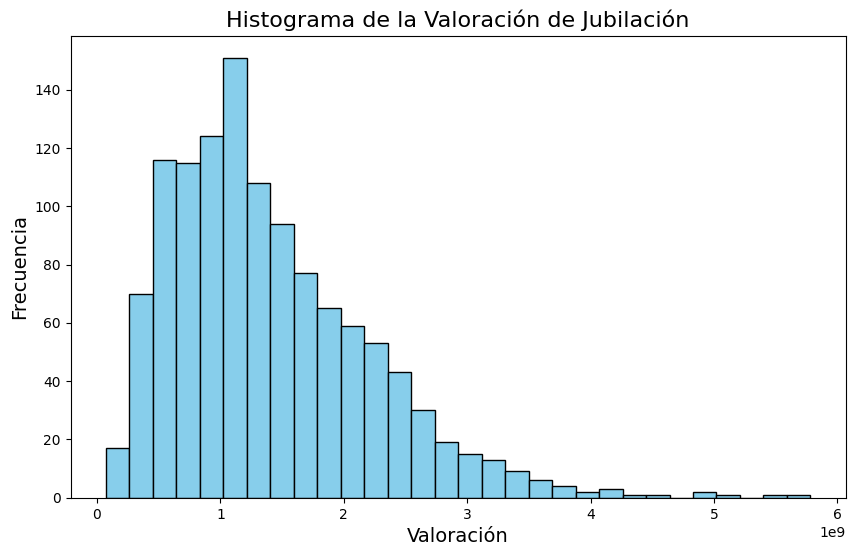

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(longevidad['Valoracion'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de la Valoración de Jubilación', fontsize=16)
plt.xlabel('Valoración', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()


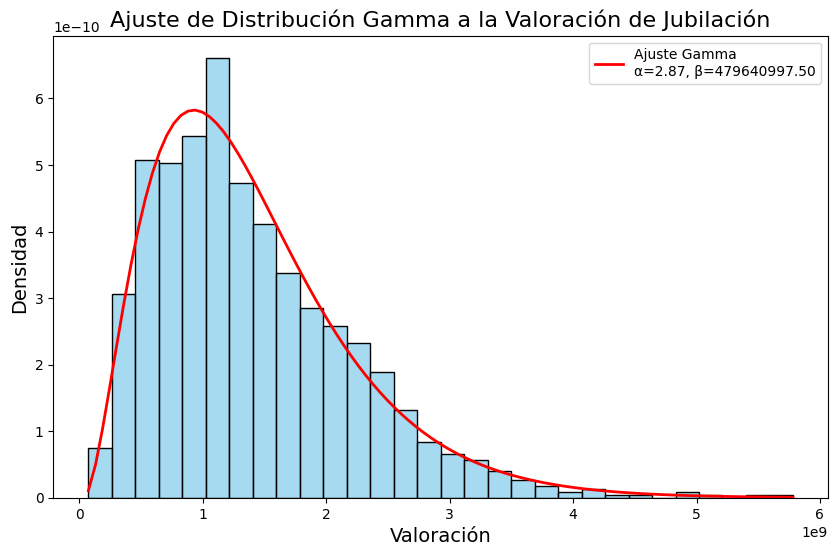

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
params = gamma.fit(longevidad['Valoracion']) 
shape, loc ,scale =gamma.fit(longevidad['Valoracion']) 
xmin, xmax = longevidad['Valoracion'].min(), longevidad['Valoracion'].max()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = gamma.pdf(x, *params)  
plt.figure(figsize=(10, 6))
sns.histplot(longevidad['Valoracion'], bins=30, kde=False, color='skyblue', stat='density', edgecolor='black')
plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'Ajuste Gamma\nα={params[0]:.2f}, β={params[2]:.2f}')
plt.title('Ajuste de Distribución Gamma a la Valoración de Jubilación', fontsize=16)
plt.xlabel('Valoración', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.show()


In [5]:

#cuantiles  de grafica gamma de valoracion
quantile_5=gamma.ppf(0.05, a=shape,scale=scale)
quantile_95=gamma.ppf(0.95, a=shape,scale=scale)
print(f"shape: {shape}")
print(f"scale : {scale}")
print(f"cualtil al 5% : {quantile_5:,.2f}")
print(f"cualtil al 95% : {quantile_95:,.2f}")
total_valoracion=longevidad['Valoracion'].sum()
print(f"total_valoracion: {total_valoracion:,.2f}")
longevidad['propuesta_70']=longevidad['Valoracion']*.7
longevidad


shape: 2.865752561174397
scale : 479640997.50117457
cualtil al 5% : 359,555,412.25
cualtil al 95% : 2,922,976,607.19
total_valoracion: 1,687,508,834,514.47


,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual,Valoracion Jubilado,Valoracion pareja,Valoracion,propuesta_70
0,1,68,0,M,0,0,"4,196,583.06","1,017,456,036.16",0.00,"1,017,456,036.16","712,219,225.31"
1,2,67,1,H,67,H,"1,983,941.40","484,784,234.22","4,985,840.73","489,770,074.95","342,839,052.47"
2,3,80,1,H,77,H,"4,014,628.81","828,188,996.93","53,608,562.26","881,797,559.19","617,258,291.44"
3,4,71,1,H,85,M,"5,710,179.97","1,339,739,654.76","6,941,368.13","1,346,681,022.89","942,676,716.02"
4,5,66,0,M,0,0,"7,882,172.76","1,946,327,113.36",0.00,"1,946,327,113.36","1,362,428,979.36"
...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,"2,994,379.20","640,482,469.74",0.00,"640,482,469.74","448,337,728.82"
1196,1197,72,1,M,69,H,"3,778,424.20","877,935,210.33","36,050,544.95","913,985,755.27","639,790,028.69"
1197,1198,76,0,M,0,0,"3,839,464.83","846,745,509.27",0.00,"846,745,509.27","592,721,856.49"
1198,1199,77,0,H,0,0,"10,827,760.94","2,348,062,669.86",0.00,"2,348,062,669.86","1,643,643,868.90"


C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\3460424537.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim['sim_' + str(i)] = np.where(simulations[i] == 1, sim['propuesta_70'], sim['Valoracion'])
C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\3460424537.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim['sim_' + str(i)] = np.where(simulations[i] == 1, sim['propuesta_70'], sim['Valoracion'])
C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\3460424537.py:10: PerformanceWarning: DataFrame is highly fragmented.  Th

sim_0     1,605,062,509,577.92
sim_1     1,599,165,723,915.79
sim_2     1,603,450,136,005.00
sim_3     1,597,025,205,617.48
sim_4     1,601,105,482,620.51
                  ...         
sim_495   1,601,945,044,202.26
sim_496   1,610,622,865,436.59
sim_497   1,596,183,369,337.84
sim_498   1,607,485,419,785.68
sim_499   1,595,000,880,392.20
Length: 500, dtype: float64
El percentil 95 de las sumas de las simulaciones es: 1,612,497,263,727.55
total_valoracion es:1,687,508,834,514.47
objetivo  30 % ahorrado es:506,252,650,354.34
ahorro simulado es :75,011,570,786.92
porcentaje de ahorro simualdo:4.45


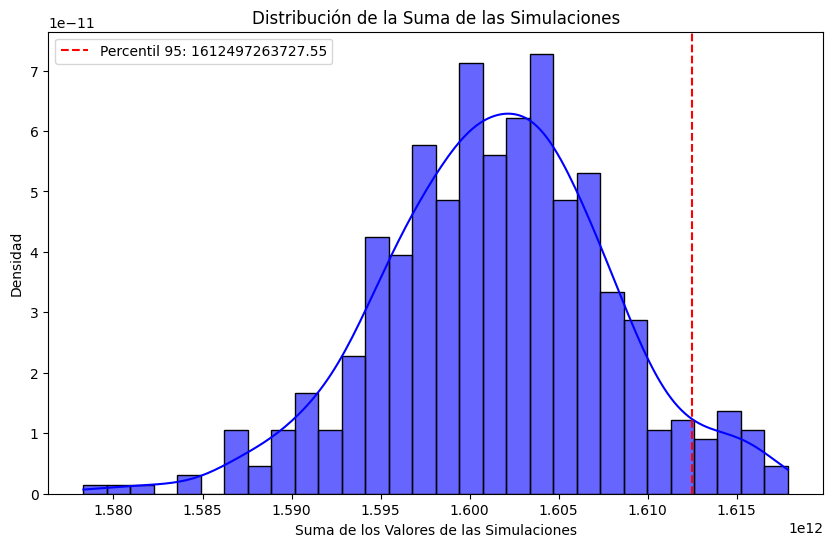

In [6]:
#simualcion  binomial al  17 %
sim = pd.DataFrame()
sim['key'] = longevidad.index
sim['Valoracion'] = longevidad['Valoracion']
sim['propuesta_70'] = longevidad['propuesta_70']
cant = 500
p = 0.17
for i in range(cant):
    simulations = np.random.binomial(1, p, (cant, len(sim)))
    sim['sim_' + str(i)] = np.where(simulations[i] == 1, sim['propuesta_70'], sim['Valoracion'])
sim
#distribucion densidadpara  el 17 % aceptacion 
sum_simulations = sim[['sim_' + str(i) for i in range(500)]].sum(axis=0)
print (sum_simulations)
percentil_95 = np.percentile(sum_simulations, 95)
plt.figure(figsize=(10, 6))
sns.histplot(sum_simulations, kde=True, color='blue', bins=30, stat="density", alpha=0.6)
plt.axvline(percentil_95, color='red', linestyle='--', label=f'Percentil 95: {percentil_95:.2f}')
plt.title('Distribución de la Suma de las Simulaciones')
plt.xlabel('Suma de los Valores de las Simulaciones')
plt.ylabel('Densidad')
plt.legend()
print(f"El percentil 95 de las sumas de las simulaciones es: {percentil_95:,.2f}")
ahorro= total_valoracion*.3
supuesto=total_valoracion-percentil_95
porcentaje_real=supuesto/total_valoracion*100
print(f"total_valoracion es:{total_valoracion:,.2f}")
print(f"objetivo  30 % ahorrado es:{ahorro:,.2f}")
print(f"ahorro simulado es :{supuesto:,.2f}")
print(f"porcentaje de ahorro simualdo:{porcentaje_real:,.2f}")

C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\777614307.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim['sim_' + str(i)] = np.where(simulations[i] == 1, sim['propuesta_70'], sim['Valoracion'])
C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\777614307.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim['sim_' + str(i)] = np.where(simulations[i] == 1, sim['propuesta_70'], sim['Valoracion'])
C:\Users\ingse\AppData\Local\Temp\ipykernel_3440\777614307.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is 

sim_0     1,504,196,575,366.67
sim_1     1,520,220,485,352.72
sim_2     1,517,042,365,013.24
sim_3     1,524,778,679,715.68
sim_4     1,518,904,333,259.38
                  ...         
sim_495   1,526,088,149,729.16
sim_496   1,512,430,419,015.78
sim_497   1,516,893,705,127.96
sim_498   1,518,868,099,814.26
sim_499   1,509,945,019,567.30
Length: 500, dtype: float64
El percentil 95 de las sumas de las simulaciones es: 1,533,384,438,331.65
total_valoracion es:1,687,508,834,514.47
objetivo  30 % ahorrado es:506,252,650,354.34
ahorro simulado es :154,124,396,182.83
porcentaje de ahorro simualdo:9.13


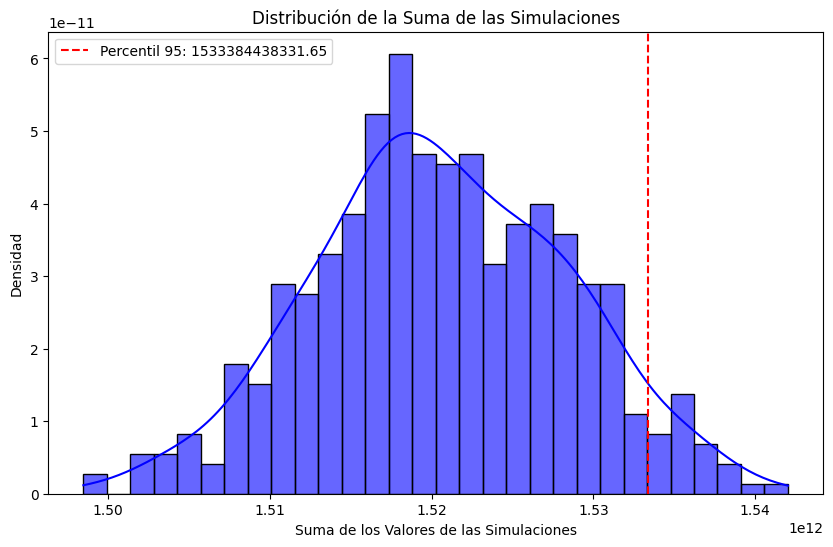

In [7]:
sim = pd.DataFrame()
sim['key'] = longevidad.index
sim['Valoracion'] = longevidad['Valoracion']
sim['propuesta_70'] = longevidad['propuesta_70']
cant = 500
p = 0.33
for i in range(cant):
    simulations = np.random.binomial(1, p, (cant, len(sim)))
    sim['sim_' + str(i)] = np.where(simulations[i] == 1, sim['propuesta_70'], sim['Valoracion'])
sim
sum_simulations = sim[['sim_' + str(i) for i in range(500)]].sum(axis=0)
print (sum_simulations)
percentil_95 = np.percentile(sum_simulations, 95)
plt.figure(figsize=(10, 6))
sns.histplot(sum_simulations, kde=True, color='blue', bins=30, stat="density", alpha=0.6)
plt.axvline(percentil_95, color='red', linestyle='--', label=f'Percentil 95: {percentil_95:.2f}')
plt.title('Distribución de la Suma de las Simulaciones')
plt.xlabel('Suma de los Valores de las Simulaciones')
plt.ylabel('Densidad')
plt.legend()

print(f"El percentil 95 de las sumas de las simulaciones es: {percentil_95:,.2f}")
ahorro= total_valoracion*.3
supuesto=total_valoracion-percentil_95
porcentaje_real=supuesto/total_valoracion*100
print(f"total_valoracion es:{total_valoracion:,.2f}")
print(f"objetivo  30 % ahorrado es:{ahorro:,.2f}")
print(f"ahorro simulado es :{supuesto:,.2f}")
print(f"porcentaje de ahorro simualdo:{porcentaje_real:,.2f}")